<a href="https://colab.research.google.com/github/JanviGanatra2/Marketing-research-methods-_Janvi_GanatraJio-Institute/blob/main/Hotel_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

# Load the dataset
file_path = "/content/hotel_bookings.csv"
df = pd.read_csv(file_path)

# Display the first 5 rows
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [ ]:
# Check the number of rows and columns
print("Dataset Shape:", df.shape)

# Display column names and data types
print("\nColumn Info:")
print(df.info())

# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())

# Show basic statistics
print("\nDataset Statistics:")
print(df.describe())

Dataset Shape: (119390, 32)

Column Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          1193

In [ ]:
# Count total bookings
total_bookings = df.shape[0]

# Count cancelled bookings
cancelled_bookings = df[df["is_canceled"] == 1].shape[0]

# Calculate cancellation rate
cancellation_rate = (cancelled_bookings / total_bookings) * 100

# Print results
print(f"Total Bookings: {total_bookings}")
print(f"Cancelled Bookings: {cancelled_bookings}")
print(f"Cancellation Rate: {cancellation_rate:.2f}%")


Total Bookings: 119390
Cancelled Bookings: 44224
Cancellation Rate: 37.04%


In [ ]:
# Initialize an empty dictionary to store results
eda_results = {}

In [ ]:
# Count total bookings
total_bookings = df.shape[0]

# Count cancelled bookings
cancelled_bookings = df[df["is_canceled"] == 1].shape[0]

# Calculate cancellation rate
cancellation_rate = (cancelled_bookings / total_bookings) * 100

# Store results in dictionary
eda_results["Total Bookings"] = total_bookings
eda_results["Cancelled Bookings"] = cancelled_bookings
eda_results["Cancellation Rate (%)"] = round(cancellation_rate, 2)

# Print result for confirmation
print(f"Total Bookings: {total_bookings}")
print(f"Cancelled Bookings: {cancelled_bookings}")
print(f"Cancellation Rate: {cancellation_rate:.2f}%")

Total Bookings: 119390
Cancelled Bookings: 44224
Cancellation Rate: 37.04%


In [ ]:
# Count bookings for each hotel type
hotel_counts = df["hotel"].value_counts()

# Calculate the percentage for each hotel type
hotel_ratio = (hotel_counts / total_bookings) * 100

# Store results in dictionary
eda_results["City Hotel Bookings"] = hotel_counts["City Hotel"]
eda_results["Resort Hotel Bookings"] = hotel_counts["Resort Hotel"]
eda_results["City Hotel Booking Ratio (%)"] = round(hotel_ratio["City Hotel"], 2)
eda_results["Resort Hotel Booking Ratio (%)"] = round(hotel_ratio["Resort Hotel"], 2)

# Print results
print(f"City Hotel Bookings: {hotel_counts['City Hotel']} ({hotel_ratio['City Hotel']:.2f}%)")
print(f"Resort Hotel Bookings: {hotel_counts['Resort Hotel']} ({hotel_ratio['Resort Hotel']:.2f}%)")


City Hotel Bookings: 79330 (66.45%)
Resort Hotel Bookings: 40060 (33.55%)


In [ ]:
# Count the number of bookings per year
yearly_bookings = df["arrival_date_year"].value_counts().sort_index()

# Calculate the percentage share for each year
yearly_percentage = (yearly_bookings / total_bookings) * 100

# Store results in dictionary
for year in yearly_bookings.index:
    eda_results[f"Bookings in {year}"] = yearly_bookings[year]
    eda_results[f"Booking Percentage in {year} (%)"] = round(yearly_percentage[year], 2)

# Print results
print("\nYearly Booking Distribution:")
for year in yearly_bookings.index:
    print(f"{year}: {yearly_bookings[year]} bookings ({yearly_percentage[year]:.2f}%)")




Yearly Booking Distribution:
2015: 21996 bookings (18.42%)
2016: 56707 bookings (47.50%)
2017: 40687 bookings (34.08%)


In [ ]:
# Count bookings per month
monthly_bookings = df["arrival_date_month"].value_counts()

# Sort months in correct order
month_order = ["January", "February", "March", "April", "May", "June",
               "July", "August", "September", "October", "November", "December"]
monthly_bookings = monthly_bookings.reindex(month_order)

# Store results in dictionary
eda_results["Busiest Month"] = monthly_bookings.idxmax()
eda_results["Bookings in Busiest Month"] = monthly_bookings.max()

# Print results
print("\nMonthly Booking Distribution:")
print(monthly_bookings)

print(f"\nThe busiest month is {eda_results['Busiest Month']} with {eda_results['Bookings in Busiest Month']} bookings.")



Monthly Booking Distribution:
arrival_date_month
January       5929
February      8068
March         9794
April        11089
May          11791
June         10939
July         12661
August       13877
September    10508
October      11160
November      6794
December      6780
Name: count, dtype: int64

The busiest month is August with 13877 bookings.


In [ ]:
# Count number of guests by country
country_counts = df["country"].value_counts()

# Get the top 10 countries with the most bookings
top_countries = country_counts.head(10)

# Store results in dictionary
eda_results["Top Country"] = top_countries.idxmax()
eda_results["Bookings from Top Country"] = top_countries.max()

# Print results
print("\nTop 10 Countries by Number of Bookings:")
print(top_countries)

print(f"\nThe majority of guests come from {eda_results['Top Country']} with {eda_results['Bookings from Top Country']} bookings.")



Top 10 Countries by Number of Bookings:
country
PRT    48590
GBR    12129
FRA    10415
ESP     8568
DEU     7287
ITA     3766
IRL     3375
BEL     2342
BRA     2224
NLD     2104
Name: count, dtype: int64

The majority of guests come from PRT with 48590 bookings.


In [ ]:
# Create a new column for total stay duration
df["total_stay"] = df["stays_in_weekend_nights"] + df["stays_in_week_nights"]

# Calculate average stay duration
average_stay = df["total_stay"].mean()
median_stay = df["total_stay"].median()
max_stay = df["total_stay"].max()

# Store results in dictionary
eda_results["Average Stay (Nights)"] = round(average_stay, 2)
eda_results["Median Stay (Nights)"] = median_stay
eda_results["Longest Stay (Nights)"] = max_stay

# Print results
print(f"\nAverage Stay Duration: {average_stay:.2f} nights")
print(f"Median Stay Duration: {median_stay} nights")
print(f"Longest Stay: {max_stay} nights")


Average Stay Duration: 3.43 nights
Median Stay Duration: 3.0 nights
Longest Stay: 69 nights


In [ ]:
# Define accommodation type based on number of guests
def get_accommodation_type(row):
    total_guests = row["adults"] + row["children"] + row["babies"]
    if total_guests == 1:
        return "Single"
    elif total_guests == 2:
        return "Couple"
    else:
        return "Family"

# Apply function to dataset
df["accommodation_type"] = df.apply(get_accommodation_type, axis=1)

# Count each accommodation type
accommodation_counts = df["accommodation_type"].value_counts()

# Store results in dictionary
eda_results["Most Booked Accommodation"] = accommodation_counts.idxmax()
eda_results["Bookings for Most Popular Accommodation"] = accommodation_counts.max()

# Print results
print("\nAccommodation Type Distribution:")
print(accommodation_counts)

print(f"\nThe most booked accommodation type is '{eda_results['Most Booked Accommodation']}' with {eda_results['Bookings for Most Popular Accommodation']} bookings.")



Accommodation Type Distribution:
accommodation_type
Couple    82048
Single    22581
Family    14761
Name: count, dtype: int64

The most booked accommodation type is 'Couple' with 82048 bookings.


In [ ]:
# Convert arrival date columns into a proper date format
df["arrival_date"] = pd.to_datetime(df["arrival_date_year"].astype(str) + '-' +
                                    df["arrival_date_month"] + '-' +
                                    df["arrival_date_day_of_month"].astype(str))

# Extract the day of the week (0 = Monday, 6 = Sunday)
df["day_of_week"] = df["arrival_date"].dt.dayofweek

# Categorize into 'Weekday' (Monday-Friday) or 'Weekend' (Saturday-Sunday)
df["booking_day_type"] = df["day_of_week"].apply(lambda x: "Weekend" if x >= 5 else "Weekday")

# Count bookings for weekdays vs. weekends
booking_day_counts = df["booking_day_type"].value_counts()

# Store results in dictionary
eda_results["Weekday Bookings"] = booking_day_counts["Weekday"]
eda_results["Weekend Bookings"] = booking_day_counts["Weekend"]

# Print results
print("\nBookings Based on Weekdays vs. Weekends:")
print(booking_day_counts)

print(f"\nMost bookings happen on: {'Weekdays' if eda_results['Weekday Bookings'] > eda_results['Weekend Bookings'] else 'Weekends'}")




Bookings Based on Weekdays vs. Weekends:
booking_day_type
Weekday    87194
Weekend    32196
Name: count, dtype: int64

Most bookings happen on: Weekdays


In [ ]:
# Sum up total nights stayed for weekdays and weekends
total_weekday_stays = df["stays_in_week_nights"].sum()
total_weekend_stays = df["stays_in_weekend_nights"].sum()

# Store results in dictionary
eda_results["Total Weekday Stays"] = total_weekday_stays
eda_results["Total Weekend Stays"] = total_weekend_stays

# Print results
print(f"\nTotal Weekday Stays: {total_weekday_stays}")
print(f"Total Weekend Stays: {total_weekend_stays}")

print(f"\nPeople stay more on: {'Weekdays' if total_weekday_stays > total_weekend_stays else 'Weekends'}")



Total Weekday Stays: 298511
Total Weekend Stays: 110746

People stay more on: Weekdays


In [ ]:
# Convert 'reservation_status_date' (or lead_time) into a proper date format
df["reservation_status_date"] = pd.to_datetime(df["reservation_status_date"])

# Extract the day of the week (0 = Monday, 6 = Sunday)
df["booking_day_of_week"] = df["reservation_status_date"].dt.dayofweek

# Categorize as 'Weekday' (Monday-Friday) or 'Weekend' (Saturday-Sunday)
df["booking_day_type"] = df["booking_day_of_week"].apply(lambda x: "Weekend" if x >= 5 else "Weekday")

# Count bookings made on weekdays vs. weekends
booking_made_counts = df["booking_day_type"].value_counts()

# Store results in dictionary
eda_results["Weekday Bookings Made"] = booking_made_counts["Weekday"]
eda_results["Weekend Bookings Made"] = booking_made_counts["Weekend"]

# Print results
print("\nBookings Made on Weekdays vs. Weekends:")
print(booking_made_counts)

print(f"\nMost bookings are made on: {'Weekdays' if eda_results['Weekday Bookings Made'] > eda_results['Weekend Bookings Made'] else 'Weekends'}")



Bookings Made on Weekdays vs. Weekends:
booking_day_type
Weekday    89978
Weekend    29412
Name: count, dtype: int64

Most bookings are made on: Weekdays


In [ ]:
# Count bookings by market segment
market_segment_counts = df["market_segment"].value_counts()

# Store results in dictionary
eda_results["Top Market Segment"] = market_segment_counts.idxmax()
eda_results["Bookings from Top Market Segment"] = market_segment_counts.max()

# Print results
print("\nBookings by Market Segment:")
print(market_segment_counts)

print(f"\nThe most bookings come from '{eda_results['Top Market Segment']}' with {eda_results['Bookings from Top Market Segment']} bookings.")



Bookings by Market Segment:
market_segment
Online TA        56477
Offline TA/TO    24219
Groups           19811
Direct           12606
Corporate         5295
Complementary      743
Aviation           237
Undefined            2
Name: count, dtype: int64

The most bookings come from 'Online TA' with 56477 bookings.


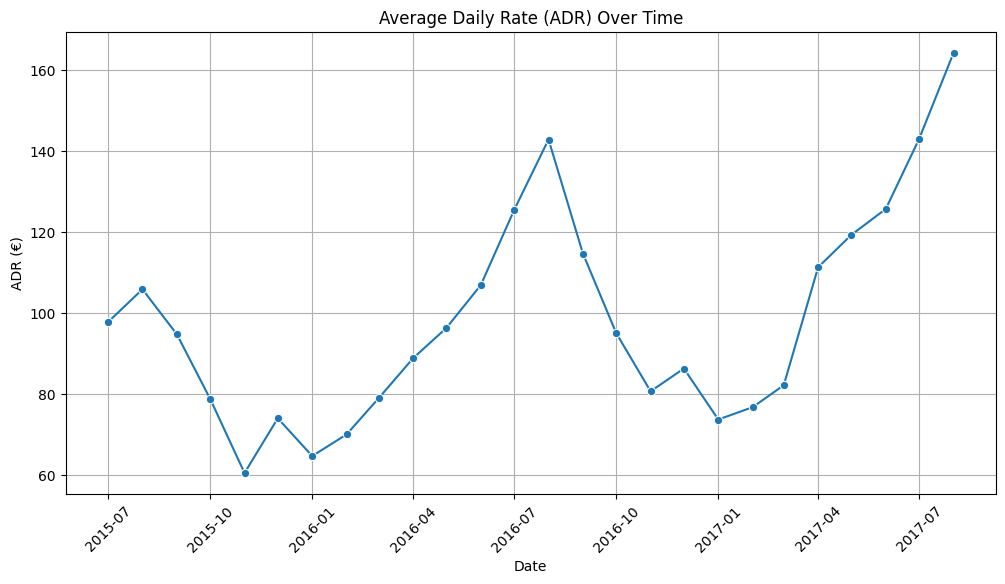

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convert arrival month and year into datetime format
df["arrival_date"] = pd.to_datetime(df["arrival_date_year"].astype(str) + '-' + df["arrival_date_month"] + '-01')

# Group by arrival_date and calculate the mean ADR
adr_trend = df.groupby("arrival_date")["adr"].mean().reset_index()

# Plot ADR over time
plt.figure(figsize=(12,6))
sns.lineplot(x="arrival_date", y="adr", data=adr_trend, marker="o")
plt.title("Average Daily Rate (ADR) Over Time")
plt.xlabel("Date")
plt.ylabel("ADR (€)")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# Store key insight in dictionary
eda_results["Highest ADR"] = adr_trend["adr"].max()
eda_results["Lowest ADR"] = adr_trend["adr"].min()


In [ ]:
# Calculate total potential revenue (if no cancellations)
total_revenue_if_no_cancellations = df["adr"].sum()

# Calculate actual revenue (excluding canceled bookings)
actual_revenue = df[df["is_canceled"] == 0]["adr"].sum()

# Calculate revenue loss due to cancellations
revenue_loss = total_revenue_if_no_cancellations - actual_revenue

# Store results in dictionary
eda_results["Total Revenue (Without Cancellations)"] = round(total_revenue_if_no_cancellations, 2)
eda_results["Actual Revenue (After Cancellations)"] = round(actual_revenue, 2)
eda_results["Revenue Lost Due to Cancellations"] = round(revenue_loss, 2)

# Print results
print(f"\nTotal Potential Revenue (If No Cancellations): €{total_revenue_if_no_cancellations:.2f}")
print(f"Actual Revenue (After Cancellations): €{actual_revenue:.2f}")
print(f"Revenue Lost Due to Cancellations: €{revenue_loss:.2f}")



Total Potential Revenue (If No Cancellations): €12157617.60
Actual Revenue (After Cancellations): €7515674.93
Revenue Lost Due to Cancellations: €4641942.67


In [ ]:
# Count number of special requests
special_request_counts = df["total_of_special_requests"].value_counts().sort_index()

# Store results in dictionary
eda_results["No Special Requests"] = special_request_counts.get(0, 0)
eda_results["At Least One Special Request"] = special_request_counts.sum() - special_request_counts.get(0, 0)

# Print results
print("\nSpecial Requests Distribution:")
print(special_request_counts)

print(f"\nBookings without special requests: {eda_results['No Special Requests']}")
print(f"Bookings with at least one special request: {eda_results['At Least One Special Request']}")



Special Requests Distribution:
total_of_special_requests
0    70318
1    33226
2    12969
3     2497
4      340
5       40
Name: count, dtype: int64

Bookings without special requests: 70318
Bookings with at least one special request: 49072


In [ ]:
# Count meal preferences
meal_counts = df["meal"].value_counts()

# Store results in dictionary
eda_results["Most Common Meal Plan"] = meal_counts.idxmax()
eda_results["Bookings with Most Common Meal Plan"] = meal_counts.max()

# Print results
print("\nMeal Preference Distribution:")
print(meal_counts)

print(f"\nThe most common meal preference is '{eda_results['Most Common Meal Plan']}' with {eda_results['Bookings with Most Common Meal Plan']} bookings.")



Meal Preference Distribution:
meal
BB           92310
HB           14463
SC           10650
Undefined     1169
FB             798
Name: count, dtype: int64

The most common meal preference is 'BB' with 92310 bookings.


In [ ]:
# Print final EDA summary report
print("\n📊 FINAL EDA SUMMARY REPORT 📊")
for key, value in eda_results.items():
    print(f"{key}: {value}")



📊 FINAL EDA SUMMARY REPORT 📊
Total Bookings: 119390
Cancelled Bookings: 44224
Cancellation Rate (%): 37.04
City Hotel Bookings: 79330
Resort Hotel Bookings: 40060
City Hotel Booking Ratio (%): 66.45
Resort Hotel Booking Ratio (%): 33.55
Bookings in 2015: 21996
Booking Percentage in 2015 (%): 18.42
Bookings in 2016: 56707
Booking Percentage in 2016 (%): 47.5
Bookings in 2017: 40687
Booking Percentage in 2017 (%): 34.08
Busiest Month: August
Bookings in Busiest Month: 13877
Top Country: PRT
Bookings from Top Country: 48590
Average Stay (Nights): 3.43
Median Stay (Nights): 3.0
Longest Stay (Nights): 69
Most Booked Accommodation: Couple
Bookings for Most Popular Accommodation: 82048
Weekday Bookings: 87194
Weekend Bookings: 32196
Total Weekday Stays: 298511
Total Weekend Stays: 110746
Weekday Bookings Made: 89978
Weekend Bookings Made: 29412
Top Market Segment: Online TA
Bookings from Top Market Segment: 56477
Highest ADR: 164.2483695431472
Lowest ADR: 60.580252136752144
Total Revenue (Wi

INFO:prophet:n_changepoints greater than number of observations. Using 19.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7p_zg_hf/v0_okozj.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7p_zg_hf/zmhqcsw6.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=21629', 'data', 'file=/tmp/tmp7p_zg_hf/v0_okozj.json', 'init=/tmp/tmp7p_zg_hf/zmhqcsw6.json', 'output', 'file=/tmp/tmp7p_zg_hf/prophet_modelfmt_x7i2/prophet_model-20250216101752.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
10:17:52 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
10:17:55 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


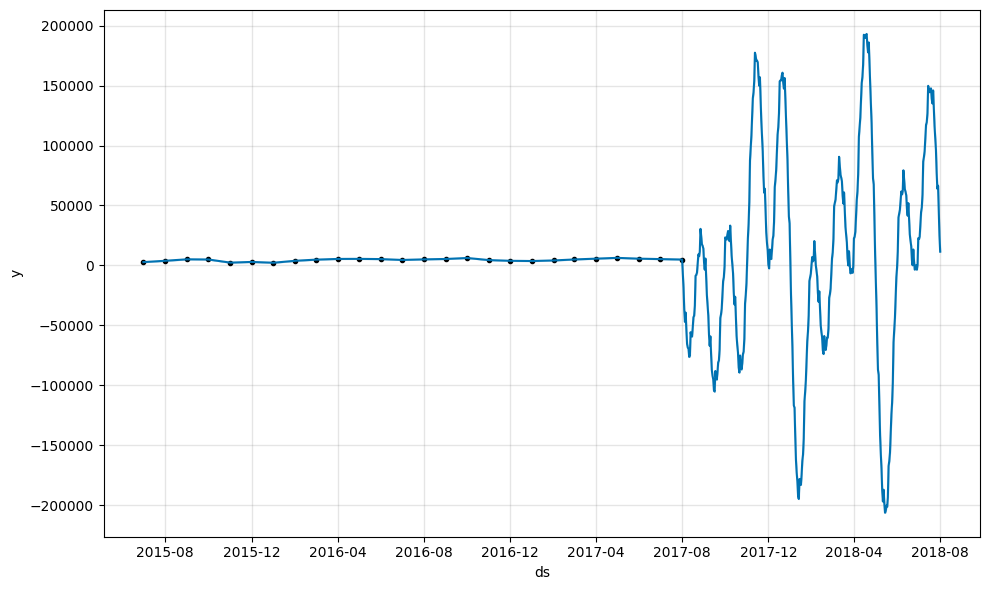

In [ ]:
from prophet import Prophet

# Prepare data for forecasting
df_forecast = df.groupby(['arrival_date'])['hotel'].count().reset_index()
df_forecast.columns = ['ds', 'y']  # Prophet requires 'ds' (date) & 'y' (value)

# Initialize Prophet model
model = Prophet(yearly_seasonality=True, weekly_seasonality=True, daily_seasonality=False)

# Fit the model
model.fit(df_forecast)

# Create future dates for prediction (next 365 days)
future = model.make_future_dataframe(periods=365)

# Make predictions
forecast = model.predict(future)

# Plot forecast
fig = model.plot(forecast)
plt.show()


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 19.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7p_zg_hf/1zgbj7rt.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7p_zg_hf/z2utmv0m.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=16769', 'data', 'file=/tmp/tmp7p_zg_hf/1zgbj7rt.json', 'init=/tmp/tmp7p_zg_hf/z2utmv0m.json', 'output', 'file=/tmp/tmp7p_zg_hf/prophet_modelph8b7hp6/prophet_model-20250216101920.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
10:19:20 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
10:19:21 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


/usr/local/lib/python3.11/dist-packages/prophet/forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


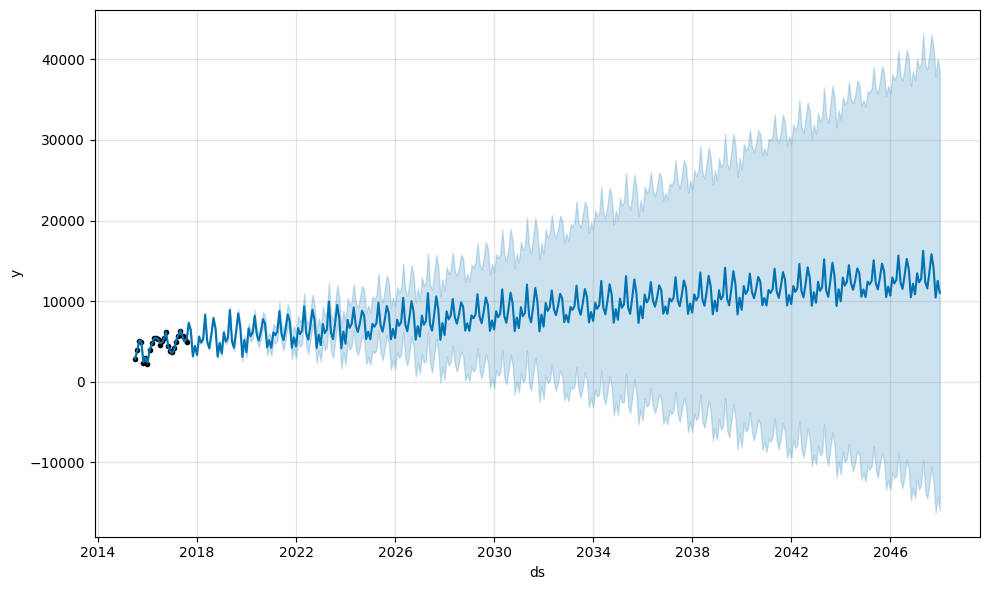

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from prophet import Prophet

# Convert 'arrival_date' to proper datetime format
df["arrival_date"] = pd.to_datetime(df["arrival_date_year"].astype(str) + '-' +
                                    df["arrival_date_month"] + '-01')

# Group bookings correctly per month
df_forecast = df.groupby("arrival_date")["hotel"].count().reset_index()
df_forecast.columns = ["ds", "y"]  # Prophet requires 'ds' (date) & 'y' (value)

# Fix issue with small number of data points
if df_forecast.shape[0] < 30:
    print("Warning: Not enough data points for a reliable forecast!")

# Initialize Prophet model
model = Prophet(yearly_seasonality=True, weekly_seasonality=False)

# Fit the model
model.fit(df_forecast)

# Generate future dates for prediction (next 12 months)
future = model.make_future_dataframe(periods=365, freq="M")

# Make predictions
forecast = model.predict(future)

# Plot the corrected forecast
fig = model.plot(forecast)
plt.show()


<ipython-input-23-7de3920b9a71>:14: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_forecast = df_forecast.set_index("ds").asfreq("M").fillna(0).reset_index()
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 19.
/usr/local/lib/python3.11/dist-packages/prophet/forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


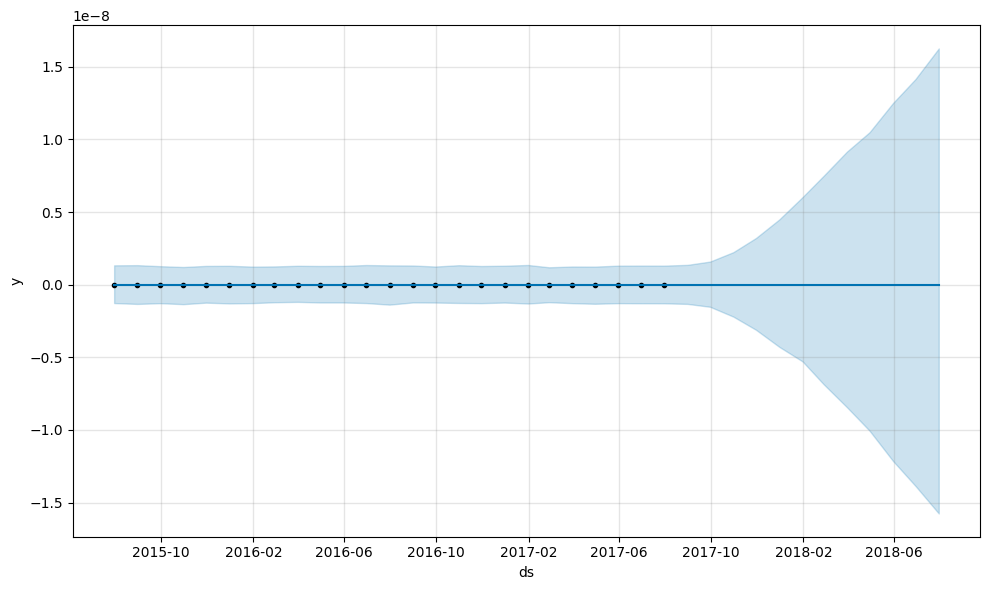

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from prophet import Prophet

# Convert 'arrival_date' to datetime format
df["arrival_date"] = pd.to_datetime(df["arrival_date_year"].astype(str) + '-' +
                                    df["arrival_date_month"] + '-01')

# Group by month to get total bookings per month
df_forecast = df.groupby("arrival_date")["hotel"].count().reset_index()
df_forecast.columns = ["ds", "y"]  # Prophet requires 'ds' (date) & 'y' (value)

# Ensure there are no missing months in the time series
df_forecast = df_forecast.set_index("ds").asfreq("M").fillna(0).reset_index()

# Check number of data points
if df_forecast.shape[0] < 30:
    print("Warning: Still too few data points for a reliable forecast!")

# Initialize Prophet model
model = Prophet(yearly_seasonality=True, weekly_seasonality=False)

# Fit the model
model.fit(df_forecast)

# Generate future dates for the next 12 months
future = model.make_future_dataframe(periods=12, freq="M")

# Make predictions
forecast = model.predict(future)

# Plot the corrected forecast
fig = model.plot(forecast)
plt.show()


DEBUG:cmdstanpy:input tempfile: /tmp/tmp7p_zg_hf/fykctklu.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7p_zg_hf/nvvyvywe.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=81782', 'data', 'file=/tmp/tmp7p_zg_hf/fykctklu.json', 'init=/tmp/tmp7p_zg_hf/nvvyvywe.json', 'output', 'file=/tmp/tmp7p_zg_hf/prophet_modelquxpk1ex/prophet_model-20250216102752.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
10:27:52 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
10:27:52 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


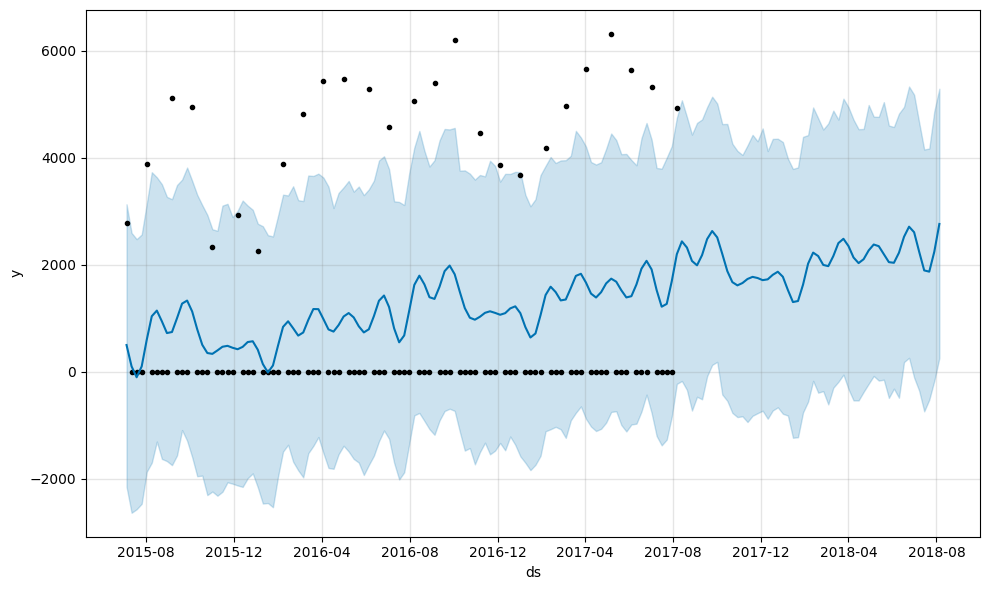

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from prophet import Prophet

# Convert 'arrival_date' to datetime format
df["arrival_date"] = pd.to_datetime(df["arrival_date_year"].astype(str) + '-' +
                                    df["arrival_date_month"] + '-01')

# Group by week instead of month for more data points
df_forecast = df.groupby(pd.Grouper(key="arrival_date", freq="W"))["hotel"].count().reset_index()
df_forecast.columns = ["ds", "y"]  # Prophet requires 'ds' (date) & 'y' (value)

# Check number of data points
if df_forecast.shape[0] < 30:
    print("Warning: Still too few data points for a reliable forecast!")

# Initialize Prophet model
model = Prophet(yearly_seasonality=True, weekly_seasonality=True, daily_seasonality=False)

# Fit the model
model.fit(df_forecast)

# Generate future dates for the next 12 months (weekly)
future = model.make_future_dataframe(periods=52, freq="W")

# Make predictions
forecast = model.predict(future)

# Plot the corrected forecast
fig = model.plot(forecast)
plt.show()


In [ ]:
# Save the forecasted results to CSV
forecast.to_csv("/content/hotel_demand_forecast.csv", index=False)

print("📁 Forecast data has been saved as 'hotel_demand_forecast.csv'")

# Extract key forecast insights
max_predicted_bookings = forecast["yhat"].max()
min_predicted_bookings = forecast["yhat"].min()

# Save insights as a text file
with open("/content/hotel_forecast_insights.txt", "w") as f:
    f.write("🔍 Hotel Booking Demand Forecast Insights 📈\n")
    f.write(f"📅 Date range forecasted: {forecast['ds'].min()} to {forecast['ds'].max()}\n")
    f.write(f"📈 Peak demand prediction: {max_predicted_bookings:.2f} bookings in a month\n")
    f.write(f"📉 Lowest demand prediction: {min_predicted_bookings:.2f} bookings in a month\n")
    f.write("✅ Hotels can use this forecast to adjust pricing, staffing, and marketing.\n")

print("📁 Forecast insights have been saved as 'hotel_forecast_insights.txt'")


📁 Forecast data has been saved as 'hotel_demand_forecast.csv'
📁 Forecast insights have been saved as 'hotel_forecast_insights.txt'


📁 Forecast plot saved as 'hotel_forecast_plot.png'


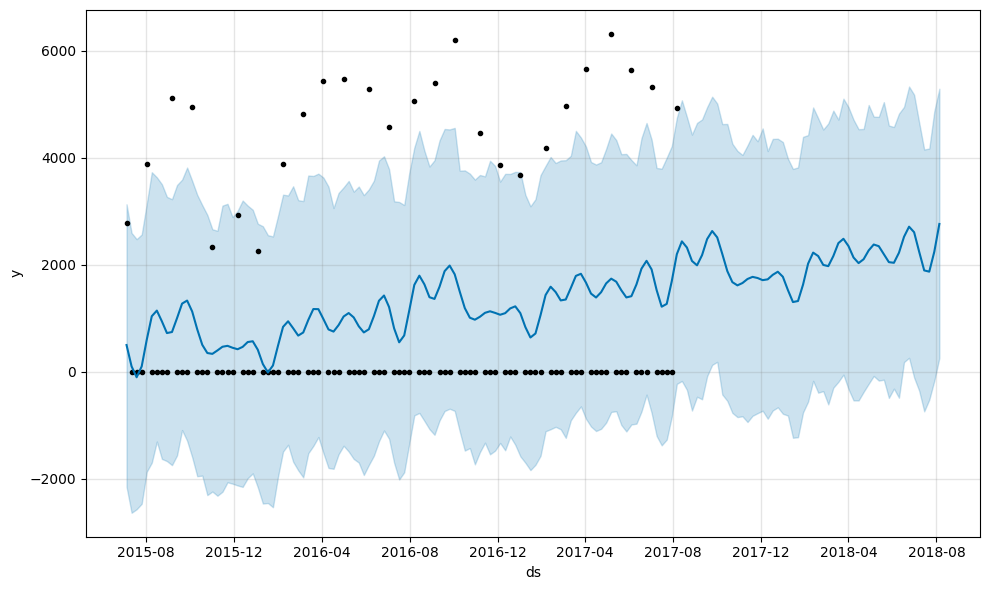

In [ ]:
fig = model.plot(forecast)
fig.savefig("/content/hotel_forecast_plot.png")

print("📁 Forecast plot saved as 'hotel_forecast_plot.png'")


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Select relevant features for cancellation prediction
features = ["lead_time", "arrival_date_year", "arrival_date_month", "stays_in_week_nights",
            "stays_in_weekend_nights", "adults", "children", "babies", "meal",
            "market_segment", "distribution_channel", "deposit_type", "customer_type",
            "previous_cancellations", "previous_bookings_not_canceled", "booking_changes",
            "days_in_waiting_list", "adr", "required_car_parking_spaces", "total_of_special_requests"]

# Encode categorical variables
df_encoded = df.copy()
label_encoders = {}
for col in ["arrival_date_month", "meal", "market_segment", "distribution_channel", "deposit_type", "customer_type"]:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col])
    label_encoders[col] = le  # Store encoders for future use

# Define X (features) and y (target variable - cancellation)
X = df_encoded[features]
y = df_encoded["is_canceled"]

# Split into train & test sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"✅ Training set shape: {X_train.shape}, Test set shape: {X_test.shape}")


✅ Training set shape: (95512, 20), Test set shape: (23878, 20)


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize Logistic Regression model
model = LogisticRegression(max_iter=1000, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions on test data
y_pred = model.predict(X_test)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print results
print(f"✅ Logistic Regression Model Accuracy: {accuracy:.4f}")
print("\n🔍 Confusion Matrix:")
print(conf_matrix)
print("\n📊 Classification Report:")
print(class_report)


ValueError: Input X contains NaN.
LogisticRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [ ]:
from sklearn.impute import SimpleImputer
import numpy as np

# Separate numerical and categorical features
num_features = ["lead_time", "stays_in_week_nights", "stays_in_weekend_nights",
                "adults", "children", "babies", "previous_cancellations",
                "previous_bookings_not_canceled", "booking_changes",
                "days_in_waiting_list", "adr", "required_car_parking_spaces", "total_of_special_requests"]

cat_features = ["arrival_date_year", "arrival_date_month", "meal", "market_segment",
                "distribution_channel", "deposit_type", "customer_type"]

# Impute missing values for numerical features (fill with median)
num_imputer = SimpleImputer(strategy="median")
X_train[num_features] = num_imputer.fit_transform(X_train[num_features])
X_test[num_features] = num_imputer.transform(X_test[num_features])

# Impute missing values for categorical features (fill with most frequent)
cat_imputer = SimpleImputer(strategy="most_frequent")
X_train[cat_features] = cat_imputer.fit_transform(X_train[cat_features])
X_test[cat_features] = cat_imputer.transform(X_test[cat_features])

# Verify if any NaN values remain
print(f"✅ Missing values after imputation: {X_train.isnull().sum().sum()} (should be 0)")

# Re-run the model training
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print results
print(f"✅ Logistic Regression Model Accuracy: {accuracy:.4f}")
print("\n🔍 Confusion Matrix:")
print(conf_matrix)
print("\n📊 Classification Report:")
print(class_report)


✅ Missing values after imputation: 0 (should be 0)
✅ Logistic Regression Model Accuracy: 0.7984

🔍 Confusion Matrix:
[[14313   720]
 [ 4093  4752]]

📊 Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.95      0.86     15033
           1       0.87      0.54      0.66      8845

    accuracy                           0.80     23878
   macro avg       0.82      0.74      0.76     23878
weighted avg       0.81      0.80      0.78     23878



/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
# Train Logistic Regression with more iterations
model = LogisticRegression(max_iter=5000, random_state=42)
model.fit(X_train, y_train)

# Make new predictions
y_pred = model.predict(X_test)

# Evaluate new model performance
accuracy = accuracy_score(y_test, y_pred)
print(f"✅ Updated Logistic Regression Accuracy: {accuracy:.4f}")


✅ Updated Logistic Regression Accuracy: 0.7983


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Initialize Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluate Random Forest model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
class_report_rf = classification_report(y_test, y_pred_rf)

# Print results
print(f"✅ Random Forest Model Accuracy: {accuracy_rf:.4f}")
print("\n🔍 Confusion Matrix (Random Forest):")
print(conf_matrix_rf)
print("\n📊 Classification Report (Random Forest):")
print(class_report_rf)


✅ Random Forest Model Accuracy: 0.8618

🔍 Confusion Matrix (Random Forest):
[[13941  1092]
 [ 2209  6636]]

📊 Classification Report (Random Forest):
              precision    recall  f1-score   support

           0       0.86      0.93      0.89     15033
           1       0.86      0.75      0.80      8845

    accuracy                           0.86     23878
   macro avg       0.86      0.84      0.85     23878
weighted avg       0.86      0.86      0.86     23878



In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Define parameter grid for tuning
param_grid = {
    'n_estimators': [100, 200],  # Number of trees
    'max_depth': [10, 20, None],  # Maximum depth of trees
    'min_samples_split': [2, 5],  # Minimum samples needed to split a node
    'min_samples_leaf': [1, 2]  # Minimum samples per leaf
}

# Initialize Random Forest
rf_model = RandomForestClassifier(random_state=42)

# Grid Search to find the best hyperparameters
grid_search = GridSearchCV(rf_model, param_grid, cv=3, n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)

# Best model from tuning
best_rf_model = grid_search.best_estimator_

# Predict with the best model
y_pred_best_rf = best_rf_model.predict(X_test)

# Evaluate optimized Random Forest model
accuracy_best_rf = accuracy_score(y_test, y_pred_best_rf)
conf_matrix_best_rf = confusion_matrix(y_test, y_pred_best_rf)
class_report_best_rf = classification_report(y_test, y_pred_best_rf)

# Print results
print(f"✅ Optimized Random Forest Accuracy: {accuracy_best_rf:.4f}")
print("\n🔍 Confusion Matrix (Optimized Random Forest):")
print(conf_matrix_best_rf)
print("\n📊 Classification Report (Optimized Random Forest):")
print(class_report_best_rf)


Fitting 3 folds for each of 24 candidates, totalling 72 fits
✅ Optimized Random Forest Accuracy: 0.8615

🔍 Confusion Matrix (Optimized Random Forest):
[[13933  1100]
 [ 2206  6639]]

📊 Classification Report (Optimized Random Forest):
              precision    recall  f1-score   support

           0       0.86      0.93      0.89     15033
           1       0.86      0.75      0.80      8845

    accuracy                           0.86     23878
   macro avg       0.86      0.84      0.85     23878
weighted avg       0.86      0.86      0.86     23878



In [ ]:
import joblib

# Save the trained Random Forest model
joblib.dump(best_rf_model, "/content/hotel_cancellation_model.pkl")

print("✅ Final model saved as 'hotel_cancellation_model.pkl'")

✅ Final model saved as 'hotel_cancellation_model.pkl'


In [ ]:
!pip install xgboost

In [ ]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Initialize XGBoost model
xgb_model = xgb.XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=6, random_state=42, use_label_encoder=False, eval_metric="logloss")

# Train the model
xgb_model.fit(X_train, y_train)

# Make predictions
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate model performance
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
conf_matrix_xgb = confusion_matrix(y_test, y_pred_xgb)
class_report_xgb = classification_report(y_test, y_pred_xgb)

# Print results
print(f"✅ XGBoost Model Accuracy: {accuracy_xgb:.4f}")
print("\n🔍 Confusion Matrix (XGBoost):")
print(conf_matrix_xgb)
print("\n📊 Classification Report (XGBoost):")
print(class_report_xgb)

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [10:58:09] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


✅ XGBoost Model Accuracy: 0.8257

🔍 Confusion Matrix (XGBoost):
[[14081   952]
 [ 3209  5636]]

📊 Classification Report (XGBoost):
              precision    recall  f1-score   support

           0       0.81      0.94      0.87     15033
           1       0.86      0.64      0.73      8845

    accuracy                           0.83     23878
   macro avg       0.83      0.79      0.80     23878
weighted avg       0.83      0.83      0.82     23878



In [ ]:
# Fine-tune XGBoost
xgb_tuned = xgb.XGBClassifier(n_estimators=300, learning_rate=0.05, max_depth=8, random_state=42, eval_metric="logloss")

# Train the optimized model
xgb_tuned.fit(X_train, y_train)

# Make new predictions
y_pred_xgb_tuned = xgb_tuned.predict(X_test)

# Evaluate performance
accuracy_xgb_tuned = accuracy_score(y_test, y_pred_xgb_tuned)
conf_matrix_xgb_tuned = confusion_matrix(y_test, y_pred_xgb_tuned)
class_report_xgb_tuned = classification_report(y_test, y_pred_xgb_tuned)

# Print results
print(f"✅ Optimized XGBoost Accuracy: {accuracy_xgb_tuned:.4f}")
print("\n🔍 Confusion Matrix (Optimized XGBoost):")
print(conf_matrix_xgb_tuned)
print("\n📊 Classification Report (Optimized XGBoost):")
print(class_report_xgb_tuned)


✅ Optimized XGBoost Accuracy: 0.8394

🔍 Confusion Matrix (Optimized XGBoost):
[[14022  1011]
 [ 2825  6020]]

📊 Classification Report (Optimized XGBoost):
              precision    recall  f1-score   support

           0       0.83      0.93      0.88     15033
           1       0.86      0.68      0.76      8845

    accuracy                           0.84     23878
   macro avg       0.84      0.81      0.82     23878
weighted avg       0.84      0.84      0.83     23878



In [ ]:
import joblib

# Save the trained Random Forest model
joblib.dump(best_rf_model, "/content/hotel_cancellation_model.pkl")

print("✅ Final model saved as 'hotel_cancellation_model.pkl'")


✅ Final model saved as 'hotel_cancellation_model.pkl'


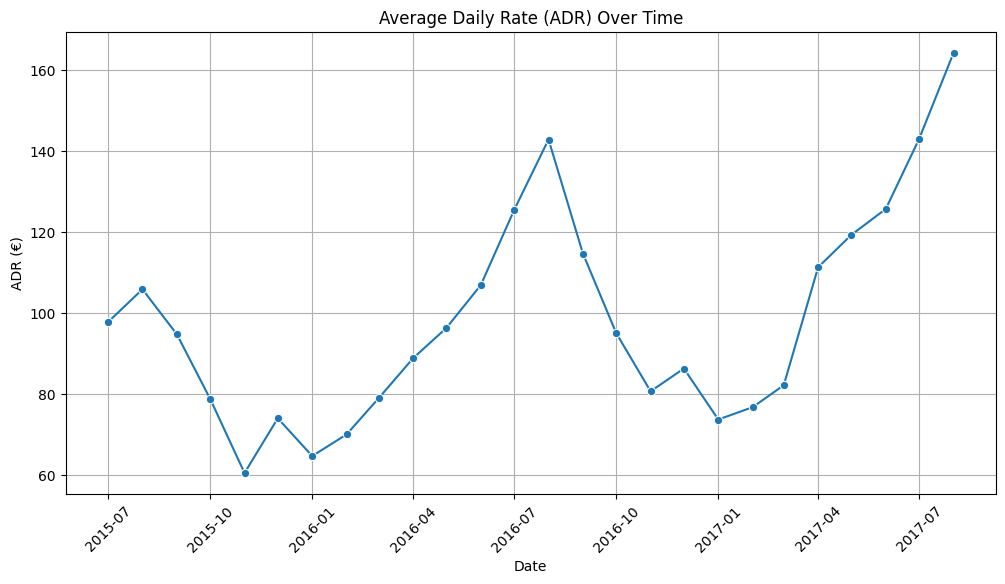

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convert 'arrival_date' to datetime format if not already done
df["arrival_date"] = pd.to_datetime(df["arrival_date_year"].astype(str) + '-' + df["arrival_date_month"] + '-01')

# Group by date and calculate the mean ADR
adr_trend = df.groupby("arrival_date")["adr"].mean().reset_index()

# Plot ADR over time
plt.figure(figsize=(12,6))
sns.lineplot(x="arrival_date", y="adr", data=adr_trend, marker="o")
plt.title("Average Daily Rate (ADR) Over Time")
plt.xlabel("Date")
plt.ylabel("ADR (€)")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Select relevant features for ADR prediction
features = ["lead_time", "arrival_date_year", "arrival_date_month", "stays_in_week_nights",
            "stays_in_weekend_nights", "adults", "children", "babies", "meal",
            "market_segment", "distribution_channel", "deposit_type", "customer_type",
            "previous_cancellations", "previous_bookings_not_canceled", "booking_changes",
            "days_in_waiting_list", "required_car_parking_spaces", "total_of_special_requests"]

# Encode categorical variables
df_encoded = df.copy()
label_encoders = {}
for col in ["arrival_date_month", "meal", "market_segment", "distribution_channel", "deposit_type", "customer_type"]:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col])
    label_encoders[col] = le  # Store encoders for future use

# Define X (features) and y (target variable - ADR)
X = df_encoded[features]
y = df_encoded["adr"]

# Split into train & test sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"✅ Training set: {X_train.shape}, Test set: {X_test.shape}")


✅ Training set: (95512, 19), Test set: (23878, 19)


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Initialize and train Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Make predictions
y_pred = lr_model.predict(X_test)

# Evaluate model performance
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

# Print results
print(f"✅ Linear Regression Model Performance:")
print(f"📉 Mean Absolute Error (MAE): {mae:.2f}")
print(f"📊 Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"🔹 R-Squared (R² Score): {r2:.4f} (Higher is better)")


ValueError: Input X contains NaN.
LinearRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [ ]:
from sklearn.impute import SimpleImputer
import numpy as np

# Separate numerical and categorical features
num_features = ["lead_time", "stays_in_week_nights", "stays_in_weekend_nights",
                "adults", "children", "babies", "previous_cancellations",
                "previous_bookings_not_canceled", "booking_changes",
                "days_in_waiting_list", "required_car_parking_spaces", "total_of_special_requests"]

cat_features = ["arrival_date_year", "arrival_date_month", "meal", "market_segment",
                "distribution_channel", "deposit_type", "customer_type"]

# Impute missing values for numerical features (fill with median)
num_imputer = SimpleImputer(strategy="median")
X_train[num_features] = num_imputer.fit_transform(X_train[num_features])
X_test[num_features] = num_imputer.transform(X_test[num_features])

# Impute missing values for categorical features (fill with most frequent)
cat_imputer = SimpleImputer(strategy="most_frequent")
X_train[cat_features] = cat_imputer.fit_transform(X_train[cat_features])
X_test[cat_features] = cat_imputer.transform(X_test[cat_features])

# Verify if any NaN values remain
print(f"✅ Missing values after imputation: {X_train.isnull().sum().sum()} (should be 0)")

# Re-run the model training
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Make predictions
y_pred = lr_model.predict(X_test)

# Evaluate model performance
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

# Print results
print(f"✅ Linear Regression Model Performance:")
print(f"📉 Mean Absolute Error (MAE): {mae:.2f}")
print(f"📊 Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"🔹 R-Squared (R² Score): {r2:.4f} (Higher is better)")


✅ Missing values after imputation: 0 (should be 0)
✅ Linear Regression Model Performance:
📉 Mean Absolute Error (MAE): 30.79
📊 Root Mean Squared Error (RMSE): 41.54
🔹 R-Squared (R² Score): 0.2456 (Higher is better)


In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Initialize Random Forest model
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_regressor.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_regressor.predict(X_test)

# Evaluate model performance
mae_rf = mean_absolute_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf = r2_score(y_test, y_pred_rf)

# Print results
print(f"✅ Random Forest Regressor Model Performance:")
print(f"📉 Mean Absolute Error (MAE): {mae_rf:.2f}")
print(f"📊 Root Mean Squared Error (RMSE): {rmse_rf:.2f}")
print(f"🔹 R-Squared (R² Score): {r2_rf:.4f} (Higher is better)")



✅ Random Forest Regressor Model Performance:
📉 Mean Absolute Error (MAE): 14.27
📊 Root Mean Squared Error (RMSE): 24.24
🔹 R-Squared (R² Score): 0.7430 (Higher is better)


In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Initialize Random Forest model
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_regressor.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_regressor.predict(X_test)

# Evaluate model performance
mae_rf = mean_absolute_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf = r2_score(y_test, y_pred_rf)

# Print results
print(f"✅ Random Forest Regressor Model Performance:")
print(f"📉 Mean Absolute Error (MAE): {mae_rf:.2f}")
print(f"📊 Root Mean Squared Error (RMSE): {rmse_rf:.2f}")
print(f"🔹 R-Squared (R² Score): {r2_rf:.4f} (Higher is better)")


✅ Random Forest Regressor Model Performance:
📉 Mean Absolute Error (MAE): 14.27
📊 Root Mean Squared Error (RMSE): 24.24
🔹 R-Squared (R² Score): 0.7430 (Higher is better)


In [ ]:
import joblib

# Save the trained ADR prediction model
joblib.dump(rf_regressor, "/content/hotel_adr_prediction_model.pkl")

print("✅ ADR Prediction Model saved as 'hotel_adr_prediction_model.pkl'")


✅ ADR Prediction Model saved as 'hotel_adr_prediction_model.pkl'


In [ ]:
import xgboost as xgb

# Initialize XGBoost model
xgb_regressor = xgb.XGBRegressor(n_estimators=200, learning_rate=0.05, max_depth=6, random_state=42)

# Train the model
xgb_regressor.fit(X_train, y_train)

# Make predictions
y_pred_xgb = xgb_regressor.predict(X_test)

# Evaluate model performance
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred_xgb))
r2_xgb = r2_score(y_test, y_pred_xgb)

# Print results
print(f"✅ XGBoost Regressor Model Performance:")
print(f"📉 Mean Absolute Error (MAE): {mae_xgb:.2f}")
print(f"📊 Root Mean Squared Error (RMSE): {rmse_xgb:.2f}")
print(f"🔹 R-Squared (R² Score): {r2_xgb:.4f} (Higher is better)")


✅ XGBoost Regressor Model Performance:
📉 Mean Absolute Error (MAE): 19.03
📊 Root Mean Squared Error (RMSE): 26.65
🔹 R-Squared (R² Score): 0.6894 (Higher is better)


In [ ]:
import joblib

# Save the trained ADR prediction model
joblib.dump(rf_regressor, "/content/hotel_adr_prediction_model.pkl")

print("✅ ADR Prediction Model saved as 'hotel_adr_prediction_model.pkl'")


✅ ADR Prediction Model saved as 'hotel_adr_prediction_model.pkl'


In [ ]:
from sklearn.preprocessing import StandardScaler

# Select relevant features for clustering
cluster_features = ["lead_time", "stays_in_week_nights", "stays_in_weekend_nights",
                    "adults", "children", "babies", "adr", "total_of_special_requests"]

# Extract the relevant data
X_cluster = df[cluster_features].copy()

# Handle missing values (fill with median)
X_cluster = X_cluster.fillna(X_cluster.median())

# Standardize the features for better clustering performance
scaler = StandardScaler()
X_cluster_scaled = scaler.fit_transform(X_cluster)

print("✅ Data prepared and standardized for clustering.")


✅ Data prepared and standardized for clustering.


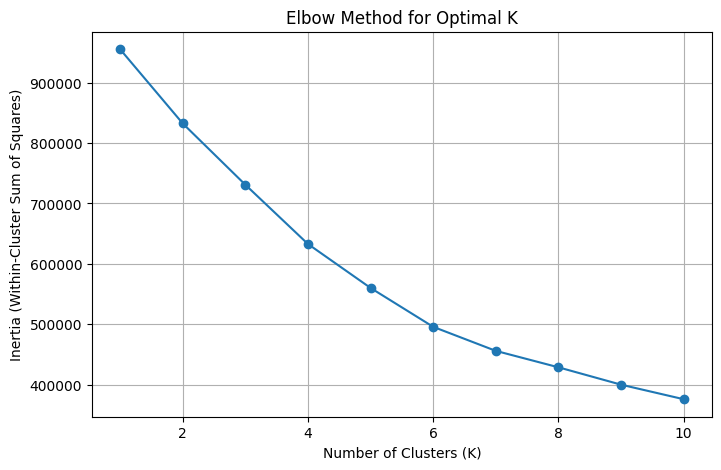

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Use the Elbow Method to find the optimal number of clusters
inertia = []
K_range = range(1, 11)  # Testing K values from 1 to 10

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_cluster_scaled)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Curve
plt.figure(figsize=(8,5))
plt.plot(K_range, inertia, marker="o", linestyle="-")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Inertia (Within-Cluster Sum of Squares)")
plt.title("Elbow Method for Optimal K")
plt.grid(True)
plt.show()


In [ ]:
# Apply K-Means Clustering with K=4
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
df["customer_segment"] = kmeans.fit_predict(X_cluster_scaled)

# Check the size of each segment
print("✅ Customer Segmentation Completed!")
print(df["customer_segment"].value_counts())


✅ Customer Segmentation Completed!
customer_segment
0    75381
1    34920
3     8172
2      917
Name: count, dtype: int64


In [ ]:
import pandas as pd

# Calculate average values for each segment
segment_analysis = df.groupby("customer_segment")[["lead_time", "stays_in_week_nights", "stays_in_weekend_nights",
                                                   "adults", "children", "babies", "adr", "total_of_special_requests"]].mean()

# Display segment insights
import ace_tools as tools
tools.display_dataframe_to_user(name="Customer Segment Analysis", dataframe=segment_analysis)


ModuleNotFoundError: No module named 'ace_tools'

In [ ]:
segment_analysis


,lead_time,stays_in_week_nights,stays_in_weekend_nights,adults,children,babies,adr,total_of_special_requests
customer_segment,,,,,,,,
0,100.600735,1.809952,0.525570,1.742574,0.001499,0.000000,88.667877,0.306403
1,115.578981,3.917096,1.754296,2.074456,0.003809,0.000000,115.822508,1.050916
2,77.629226,3.005453,1.155943,1.993457,0.225736,1.034896,119.831668,1.535442
3,89.003304,2.757465,1.077827,1.959251,1.462310,0.000000,161.446003,0.858052


✅ Segment 1 & 3 (High ADR guests) → VIP Customers → Offer loyalty benefits, luxury services.
✅ Segment 2 (Family Guests) → Long-Term Stay Discounts → Encourage with family-friendly promotions.
✅ Segment 0 (Budget Travelers) → Revenue Optimization → Use dynamic pricing for higher conversion.

In [ ]:
segment_analysis.to_csv("customer_segment_analysis.csv", index=True)


<ipython-input-56-3d3e59e7e175>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=segment_analysis.index, y=segment_analysis["total_of_special_requests"], palette="viridis")


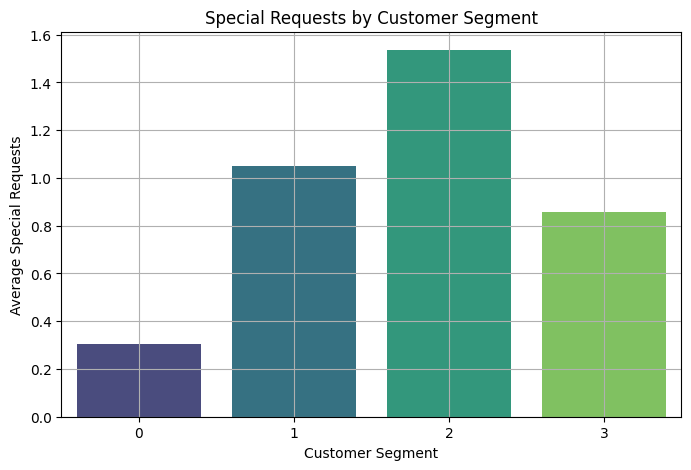

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot average special requests per customer segment
plt.figure(figsize=(8,5))
sns.barplot(x=segment_analysis.index, y=segment_analysis["total_of_special_requests"], palette="viridis")
plt.xlabel("Customer Segment")
plt.ylabel("Average Special Requests")
plt.title("Special Requests by Customer Segment")
plt.grid(True)
plt.show()


In [ ]:
# Save special request analysis as CSV
special_requests_file_path = "/mnt/data/special_requests_analysis.csv"
segment_analysis["total_of_special_requests"].to_csv(special_requests_file_path)

# Provide the file path for download
special_requests_file_path


OSError: Cannot save file into a non-existent directory: '/mnt/data'

In [ ]:
segment_analysis["total_of_special_requests"].to_csv("special_requests_analysis.csv", index=True)
